In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("data/top_neurons/git_1vd125_s1_e23_blimp_top_neurons_per_subtask.pkl", "rb") as f:
    top_neurons = pickle.load(f)

In [3]:
top_neurons_total = {}
for task, layer_dict in top_neurons.items():
    task_neurons = []
    for layer, tensors in layer_dict.items():
        top, effects = tensors
        top_new = [f"{layer}_{neuron}" for neuron in top]
        neuron_with_effect = [(neuron, effect) for neuron, effect in zip(top_new, effects)]
        task_neurons.extend(neuron_with_effect)
        task_neurons.sort(key=lambda x: x[1], reverse=True)
    top_neurons_total[task] = task_neurons

In [4]:
overlap = pd.DataFrame(index=top_neurons_total.keys(), columns=top_neurons_total.keys())
for task_a, neurons_a in top_neurons_total.items():
    for task_b, neurons_b in top_neurons_total.items():
        set_a = set([x[0] for x in neurons_a[:31]])
        set_b = set([x[0] for x in neurons_b[:31]])
        intersection = set_a.intersection(set_b)
        overlap_amount = len(intersection)
        overlap.loc[task_a, task_b] = overlap_amount

overlap = overlap.astype(int)

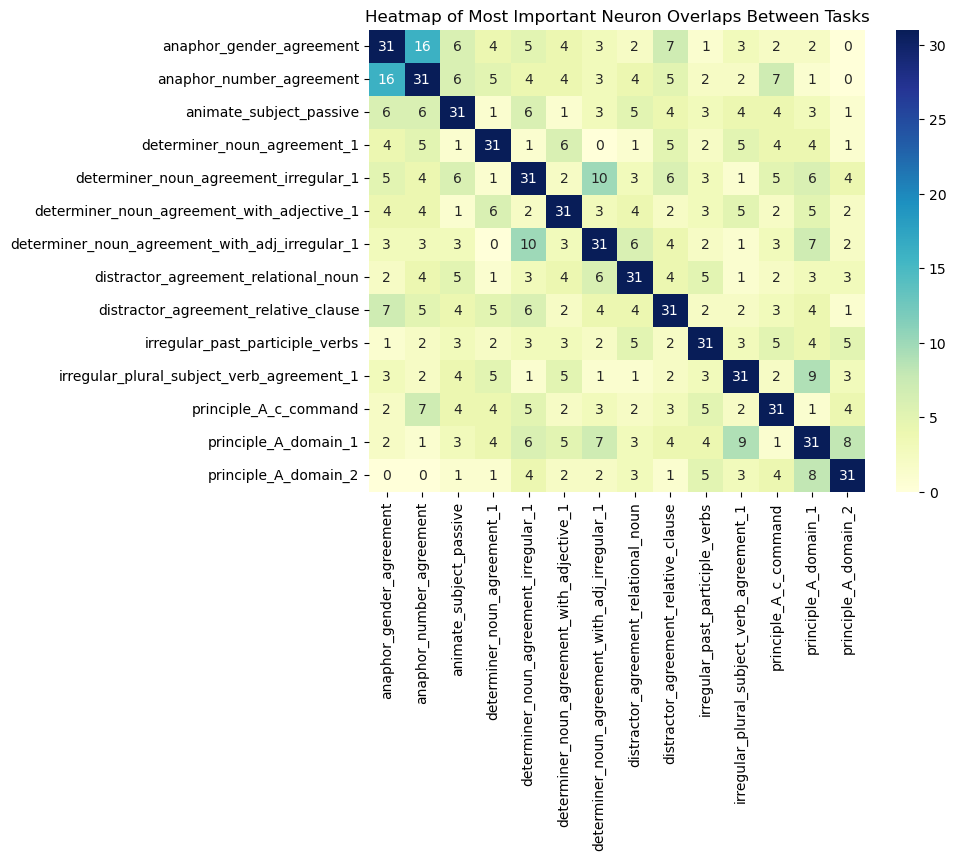

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(overlap, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Most Important Neuron Overlaps Between Tasks')
plt.show()